In [26]:
import warnings
warnings.filterwarnings("ignore")

## Downloading the Indina Startup Funding Dataset

In [27]:
pip install kagglehub

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sudalairajkumar/indian-startup-funding")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\sudalairajkumar\indian-startup-funding\versions\4


## Install Some Required Modules

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
os.makedirs("visuals", exist_ok=True)

## Load The Dataset

In [30]:
df = pd.read_csv("C:/Users/Hp/Desktop/startup-funding-eda/data.csv")
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


## Let's Check out basic information of the dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


# 🧽 Remove extra spaces in string columns

In [32]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Rename columns to snake_case and fix typos

In [33]:
df.columns = [
    'sr_no', 'date', 'startup_name', 'industry_vertical',
    'sub_vertical', 'city', 'investors_name',
    'investment_type', 'amount_in_usd', 'remarks'
]

## Convert 'date' column to datetime

In [34]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [35]:
df.head()

,sr_no,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_in_usd,remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


# Clean 'amount_usd' column

In [36]:
df["amount_in_usd"] = df["amount_in_usd"].astype(str).str.replace(",", "", regex=False)
df["amount_in_usd"] = df["amount_in_usd"].replace(["undisclosed", "Undisclosed", "unknown", "Unknown", "inf", "NaN", "nan"], "0")
df["amount_in_usd"] = pd.to_numeric(df["amount_in_usd"], errors="coerce").fillna(0).astype(int)

In [37]:
df.head()

,sr_no,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_in_usd,remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sr_no              3044 non-null   int64         
 1   date               3036 non-null   datetime64[ns]
 2   startup_name       3044 non-null   object        
 3   industry_vertical  2873 non-null   object        
 4   sub_vertical       2108 non-null   object        
 5   city               2864 non-null   object        
 6   investors_name     3020 non-null   object        
 7   investment_type    3040 non-null   object        
 8   amount_in_usd      3044 non-null   int64         
 9   remarks            419 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 237.9+ KB


In [39]:
df.isnull().sum()

sr_no                   0
date                    8
startup_name            0
industry_vertical     171
sub_vertical          936
city                  180
investors_name         24
investment_type         4
amount_in_usd           0
remarks              2625
dtype: int64

# Fill missing values

In [40]:
df['industry_vertical'].fillna('Unknown', inplace=True)
df['sub_vertical'].fillna('Unknown', inplace=True)
df['city'].fillna('Unknown', inplace=True)
df['investors_name'].fillna('Undisclosed', inplace=True)

# Dropping remarks column as it is optional

In [41]:
df.drop('remarks', inplace=True, axis=1)

# Drop rows where date and investment type both are missing

In [42]:
df = df.dropna(subset=['date', 'investment_type'])
df.isnull().sum()

sr_no                0
date                 0
startup_name         0
industry_vertical    0
sub_vertical         0
city                 0
investors_name       0
investment_type      0
amount_in_usd        0
dtype: int64

In [43]:
df['year'] = df['date'].dt.year
df

,sr_no,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_in_usd,year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,2020
...,...,...,...,...,...,...,...,...,...,...
3039,3040,2015-01-29,Printvenue,Unknown,Unknown,Unknown,Asia Pacific Internet Group,Private Equity,4500000,2015
3040,3041,2015-01-29,Graphene,Unknown,Unknown,Unknown,KARSEMVEN Fund,Private Equity,825000,2015
3041,3042,2015-01-30,Mad Street Den,Unknown,Unknown,Unknown,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000,2015
3042,3043,2015-01-30,Simplotel,Unknown,Unknown,Unknown,MakeMyTrip,Private Equity,0,2015


# How has startup funding changed over the years?

In [44]:
yearly_funding = df.groupby('year')['amount_in_usd'].sum()
yearly_funding

year
2015     8597207368
2016     3828088608
2017    10429309730
2018     5116118369
2019     9478947525
2020      390207254
Name: amount_in_usd, dtype: int64

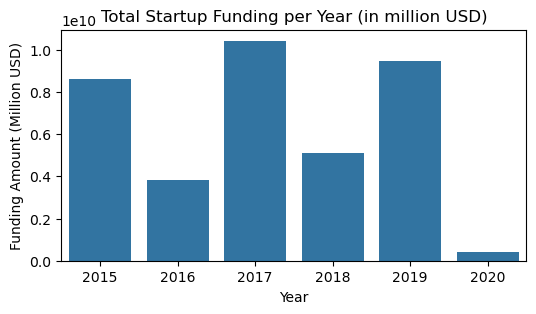

In [45]:
plt.figure(figsize=(6,3))
sns.barplot(x=yearly_funding.index, y=yearly_funding.values)
plt.title("Total Startup Funding per Year (in million USD)")
plt.ylabel("Funding Amount (Million USD)")
plt.xlabel("Year")
plt.savefig("visuals/funding_by_year.png")
plt.show()

# Which industries get the most funding?

In [46]:
sector_funding = df.groupby('industry_vertical')['amount_in_usd'].sum().sort_values(ascending=False).head(10)
sector_funding 

industry_vertical
Consumer Internet     6246834245
eCommerce             5002533000
Transportation        3916632394
Technology            2229707930
Finance               1971438000
ECommerce             1878797608
Unknown               1230961368
FinTech               1220711265
E-Commerce            1003220089
Online Marketplace     700143000
Name: amount_in_usd, dtype: int64

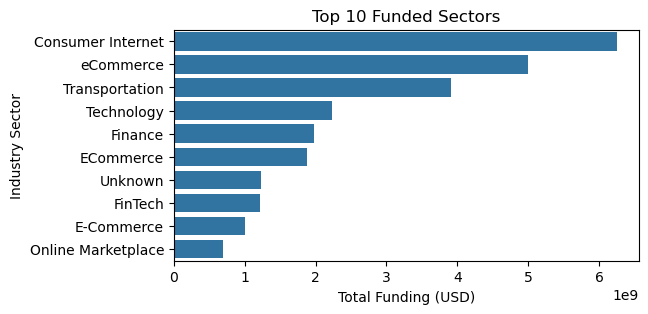

In [47]:
plt.figure(figsize=(6,3))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title("Top 10 Funded Sectors")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Industry Sector")
plt.savefig("visuals/top_funded_sectors.png")
plt.show()

# Which cities are the startup hubs?

In [48]:
top_cities = df.groupby('city')['amount_in_usd'].sum().sort_values(ascending=False).head(10)
top_cities

city
Bangalore    11361588108
Bengaluru     7098578755
Mumbai        4911805015
New Delhi     3017816875
Gurgaon       3000406159
Unknown       1271013868
Noida         1262864000
Gurugram       865932523
Chennai        718767000
Pune           633082000
Name: amount_in_usd, dtype: int64

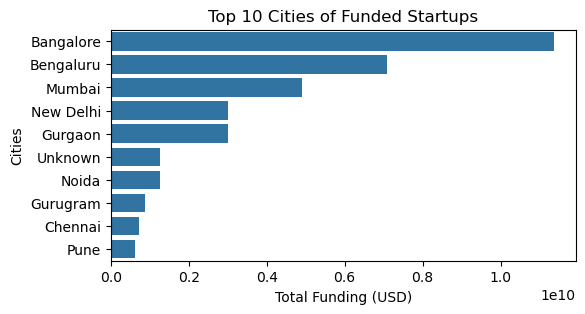

In [49]:
plt.figure(figsize=(6,3))
sns.barplot(x=top_cities.values,  y=top_cities.index)
plt.title("Top 10 Cities of Funded Startups")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Cities")
plt.savefig("visuals/top_funded_cities.png")
plt.show()

# Most Common Investment Types

In [50]:
most_common_investment = df["investment_type"].value_counts().idxmax()
print("Most Common Investment Type:", most_common_investment)

Most Common Investment Type: Private Equity


# Top Most Active Investors

In [51]:
df.head()

,sr_no,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount_in_usd,year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,2020
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,2020
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,2020
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,2020


In [52]:
top_investors = df['investors_name'].value_counts().head(10)
top_investors

investors_name
Undisclosed Investors       39
Undisclosed                 35
Undisclosed investors       30
Ratan Tata                  25
Indian Angel Network        23
Kalaari Capital             16
Sequoia Capital             15
Group of Angel Investors    14
Accel Partners              12
Undisclosed Investor        12
Name: count, dtype: int64

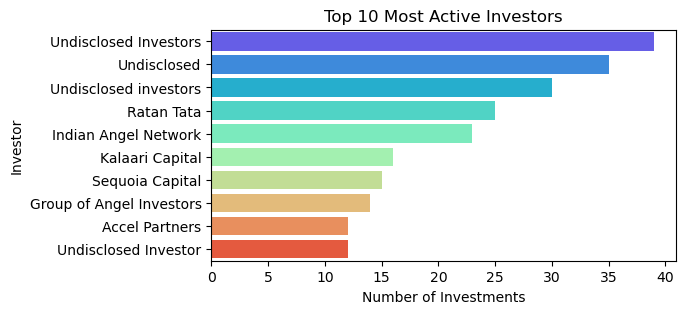

In [53]:
plt.figure(figsize=(6,3))
sns.barplot(x=top_investors.values, y=top_investors.index, palette='rainbow')
plt.title("Top 10 Most Active Investors")
plt.xlabel("Number of Investments")
plt.ylabel("Investor")
plt.savefig("visuals/top_10_investors.png")
plt.show()


# Average Funding Per Startup Over the Years

In [54]:
average_funding = df.groupby("year")["amount_in_usd"].mean()
average_funding

year
2015    9.254260e+06
2016    3.858960e+06
2017    1.518095e+07
2018    1.655702e+07
2019    8.776803e+07
2020    5.574389e+07
Name: amount_in_usd, dtype: float64

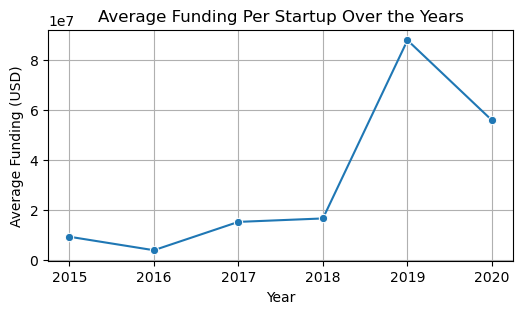

In [55]:
plt.figure(figsize=(6,3))
sns.lineplot(x=average_funding.index, y=average_funding.values, marker='o')
plt.title("Average Funding Per Startup Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Funding (USD)")
plt.grid(True)
plt.savefig("visuals/average_funding_per_year.png")
plt.show()


# Total Funding Amount by Year & Investment Type

In [56]:
funding_by_year_type = df.groupby(['year','investment_type'])['amount_in_usd'].sum().reset_index()
funding_by_year_type

,year,investment_type,amount_in_usd
0,2015,Crowd Funding,30768
1,2015,Crowd funding,125000
2,2015,Private Equity,8434765000
3,2015,Private\\nEquity,1000000
4,2015,Seed Funding,151279000
...,...,...,...
73,2020,Private Equity Round,350000000
74,2020,Seed Round,1800000
75,2020,Series A,9000000
76,2020,Series B,18358860


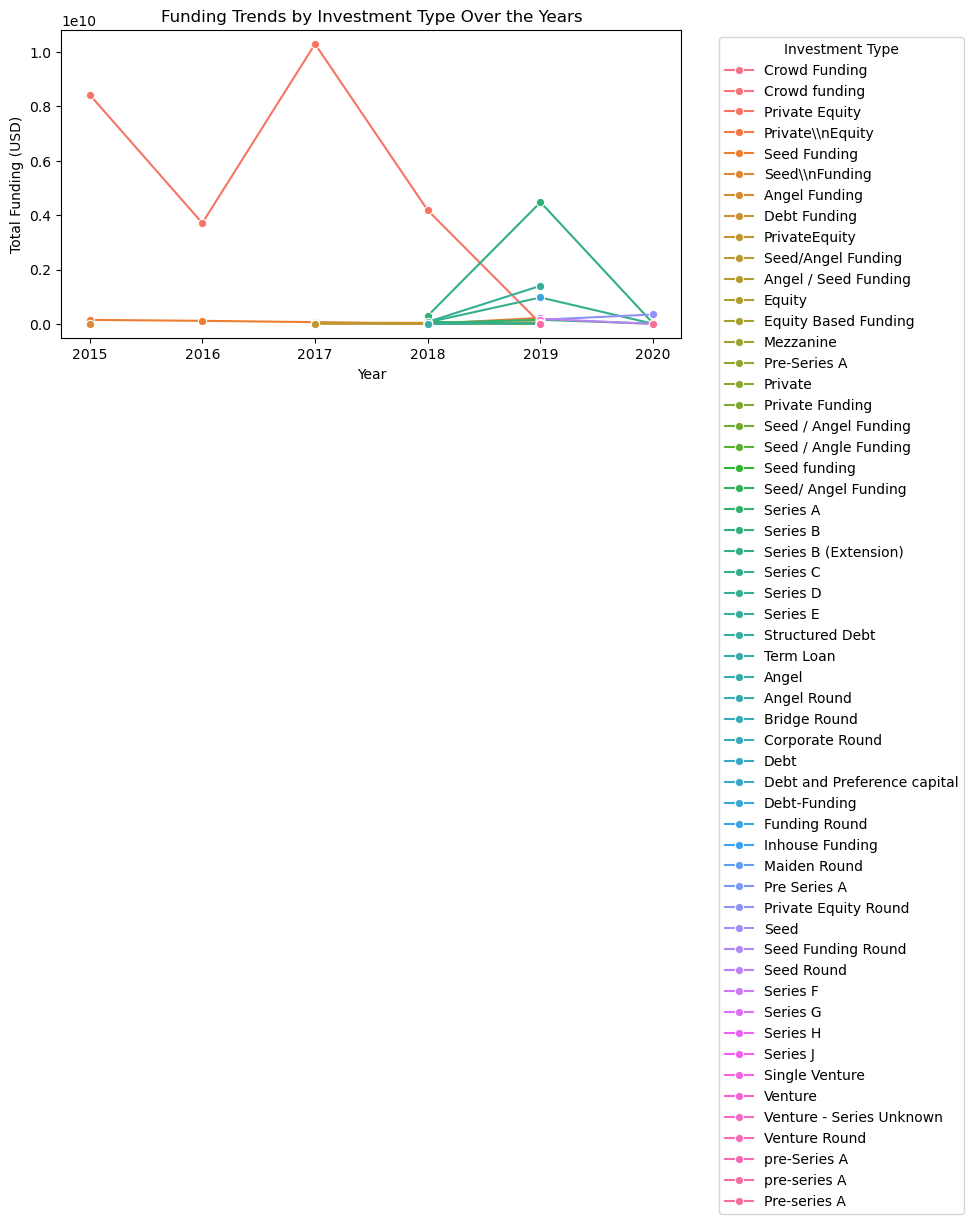

In [57]:
plt.figure(figsize=(8,4))
sns.lineplot(data=funding_by_year_type, x='year', y='amount_in_usd', hue='investment_type', marker='o')
plt.title("Funding Trends by Investment Type Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.legend(title='Investment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("visuals/funding_trends.png")
plt.show()

# Top 5 (for better understanding)

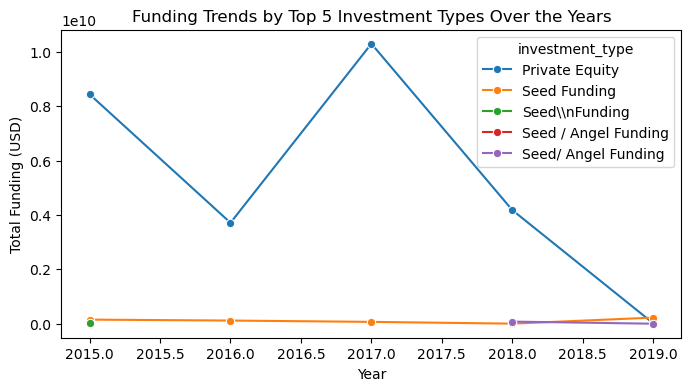

In [58]:
top_investments = df["investment_type"].value_counts().head(5).index.tolist()

filtered_df = df[df["investment_type"].isin(top_investments)]

trend_data = filtered_df.groupby(["year", "investment_type"])["amount_in_usd"].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=trend_data, x="year", y="amount_in_usd", hue="investment_type", marker="o")
plt.title("Funding Trends by Top 5 Investment Types Over the Years")
plt.ylabel("Total Funding (USD)")
plt.xlabel("Year")
plt.savefig("visuals/top_investment_types.png")
plt.show()